In [1]:
import tensorflow as tf
import keras
import os

Using TensorFlow backend.


In [2]:
tf.__version__

'2.2.0'

In [3]:
keras.__version__

'2.3.1'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(x_train_full,y_train_full),(x_test,y_test) = fashion_mnist.load_data()

In [6]:
x_train_full.shape

(60000, 28, 28)

In [7]:
x_train_full.dtype

dtype('uint8')

In [8]:
x_valid, x_train = x_train_full[:5000]/255.0, x_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
classes_name = ['top','trouser','pullover','dress','coat','sandel','shirt','sneaker','bag','ankel_foot']

In [10]:
classes_name[y_train[0]]

'coat'

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.layers

In [14]:
model.layers[1].name

'dense_1'

In [15]:
weight, bias = model.layers[1].get_weights()

In [16]:
weight

array([[ 0.04673789, -0.01543901, -0.03709054, ...,  0.06536543,
         0.05241293,  0.03049415],
       [-0.02131725,  0.06188363,  0.05691321, ..., -0.00617593,
        -0.00032941, -0.00478248],
       [-0.01312504, -0.07109956,  0.04332444, ...,  0.00975209,
         0.02750094, -0.05841093],
       ...,
       [ 0.01572292, -0.02063402, -0.03183471, ...,  0.02418909,
        -0.03834871, -0.03558042],
       [-0.01275774,  0.00877919,  0.03806804, ..., -0.04562882,
         0.04154285,  0.04297592],
       [-0.02279917, -0.0701571 , -0.0497482 , ...,  0.02574557,
        -0.07041511, -0.01891063]], dtype=float32)

In [17]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [18]:
weight.shape

(784, 300)

In [19]:
bias.shape

(300,)

In [20]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [21]:
checkpoints = keras.callbacks.ModelCheckpoint('checkpoints_mnist.h5', save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [22]:
root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [103]:
history = model.fit(x_train, 
                    y_train, 
                    epochs = 30, 
                    validation_data=(x_valid,y_valid), 
                    callbacks=[checkpoints, early_stopping, tensorboard_cb]
                   )

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 8s 137us/step - loss: 0.4857 - accuracy: 0.8255 - val_loss: 0.3613 - val_accuracy: 0.8660
Epoch 2/30
55000/55000 [==============================] - 7s 134us/step - loss: 0.3635 - accuracy: 0.8670 - val_loss: 0.3424 - val_accuracy: 0.8780
Epoch 3/30
55000/55000 [==============================] - 7s 134us/step - loss: 0.3268 - accuracy: 0.8788 - val_loss: 0.3280 - val_accuracy: 0.8804
Epoch 4/30
55000/55000 [==============================] - 7s 134us/step - loss: 0.3016 - accuracy: 0.8877 - val_loss: 0.3283 - val_accuracy: 0.8790
Epoch 5/30
55000/55000 [==============================] - 7s 133us/step - loss: 0.2830 - accuracy: 0.8931 - val_loss: 0.3156 - val_accuracy: 0.8870
Epoch 6/30
55000/55000 [==============================] - 7s 133us/step - loss: 0.2700 - accuracy: 0.8975 - val_loss: 0.3104 - val_accuracy: 0.8878
Epoch 7/30
55000/55000 [==============================] - 7s 13

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

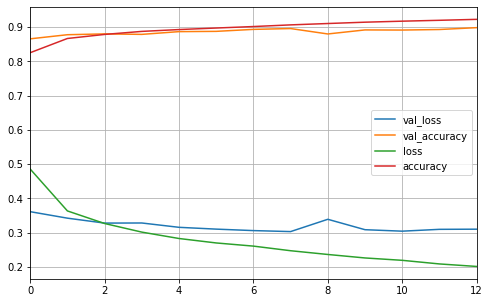

In [105]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid()

In [106]:
model.save('mnist.h5')

In [23]:
model = keras.models.load_model('mnist.h5')

In [ ]:
#tensorboard --logdir=./my_logs --port=6006